In [125]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the data from Google Drive
file_path = '/content/drive/MyDrive/HSBC/train_hsbc_df.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0   'C583110837'  '3'    'M'    '28007'   'M480139044'     '28007'   
1     0  'C1332295774'  '3'    'M'    '28007'   'M480139044'     '28007'   
2     0  'C1160421902'  '3'    'M'    '28007'   'M857378720'     '28007'   
3     0   'C966214713'  '3'    'M'    '28007'   'M857378720'     '28007'   
4     0  'C1450140987'  '4'    'F'    '28007'  'M1198415165'     '28007'   

                 category  amount  fraud  
0             'es_health'   44.26      1  
1             'es_health'  324.50      1  
2      'es_hotelservices'  176.32      1  
3      'es_hotelservices'  337.41      1  
4  'es_wellnessandbeauty'  220.11      1  


In [126]:
print(data.dtypes)
data.shape

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


(513643, 10)

In [127]:
# Unique values in 'gender' column
print("Unique values in 'gender':", data['gender'].unique())

# Count of unique values in 'category' column
print("Unique values in 'category':", data['category'].unique())

# Value counts in 'fraud' column
print("Unique values in 'fraud':\n", data['fraud'].unique())

# Summary statistics for 'amount' column
print("Unique values in 'amount':\n", data['amount'].unique())

# Check for missing values in 'age' column
print("Unique values in 'age':", data['age'].unique())

print("Number of unique values in 'customer':", data['customer'].nunique())



Unique values in 'gender': ["'M'" "'F'" "'E'" "'U'"]
Unique values in 'category': ["'es_health'" "'es_hotelservices'" "'es_wellnessandbeauty'"
 "'es_sportsandtoys'" "'es_home'" "'es_otherservices'" "'es_fashion'"
 "'es_leisure'" "'es_travel'" "'es_barsandrestaurants'" "'es_tech'"
 "'es_hyper'" "'es_transportation'" "'es_food'" "'es_contents'"]
Unique values in 'fraud':
 [1 0]
Unique values in 'amount':
 [ 44.26 324.5  176.32 ... 258.61 224.81 190.31]
Unique values in 'age': ["'3'" "'4'" "'2'" "'5'" "'1'" "'6'" "'0'" "'U'"]
Number of unique values in 'customer': 4112


In [128]:
# Loop through each column in the dataframe
for column in data.columns:
    print(f"Column: {column}")

    # Unique values
    unique_values = data[column].unique()
    print(f"Unique values: {unique_values[:5]}...")  # Show only the first 5 unique values for brevity
    print(f"Total unique values: {len(unique_values)}")

    # Number of unique values
    unique_count = data[column].nunique()
    print(f"Number of unique values: {unique_count}")

    # Value counts
    value_counts = data[column].value_counts()
    print(f"Value counts:\n{value_counts.head(5)}")  # Show only the top 5 most common values for brevity

    print("\n" + "-"*50 + "\n")  # Separator between columns


Column: step
Unique values: [0 1 2 3 4]...
Total unique values: 180
Number of unique values: 180
Value counts:
step
178    3249
177    3245
174    3245
156    3244
175    3243
Name: count, dtype: int64

--------------------------------------------------

Column: customer
Unique values: ["'C583110837'" "'C1332295774'" "'C1160421902'" "'C966214713'"
 "'C1450140987'"]...
Total unique values: 4112
Number of unique values: 4112
Value counts:
customer
'C1978250683'    220
'C1275518867'    211
'C806399525'     190
'C515668508'     183
'C1338396147'    173
Name: count, dtype: int64

--------------------------------------------------

Column: age
Unique values: ["'3'" "'4'" "'2'" "'5'" "'1'"]...
Total unique values: 8
Number of unique values: 8
Value counts:
age
'2'    161810
'3'    127071
'4'     94151
'5'     54071
'1'     50180
Name: count, dtype: int64

--------------------------------------------------

Column: gender
Unique values: ["'M'" "'F'" "'E'" "'U'"]...
Total unique values: 4
Numbe

In [129]:
df = data.drop(columns=['zipcodeOri', 'zipMerchant'])


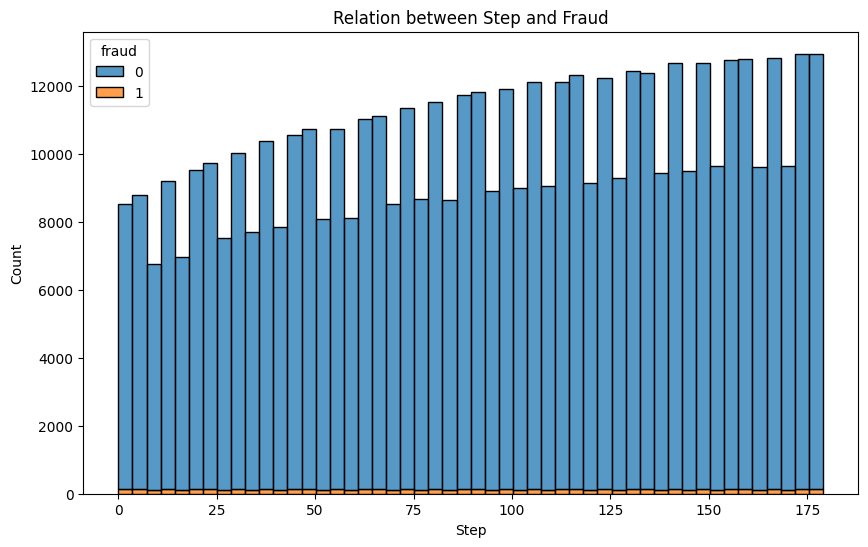

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='step', hue='fraud', multiple='stack', bins=50)
plt.title('Relation between Step and Fraud')
plt.xlabel('Step')
plt.ylabel('Count')
plt.show()


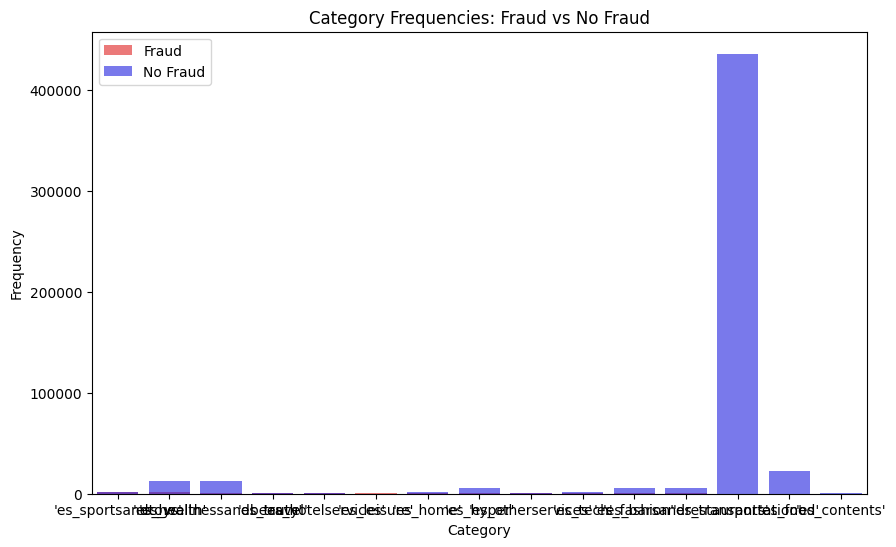

In [131]:
category_fraud = df[df['fraud'] == 1]['category'].value_counts()
category_no_fraud = df[df['fraud'] == 0]['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_fraud.index, y=category_fraud.values, color='red', alpha=0.6, label='Fraud')
sns.barplot(x=category_no_fraud.index, y=category_no_fraud.values, color='blue', alpha=0.6, label='No Fraud')
plt.title('Category Frequencies: Fraud vs No Fraud')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.legend()
plt.show()


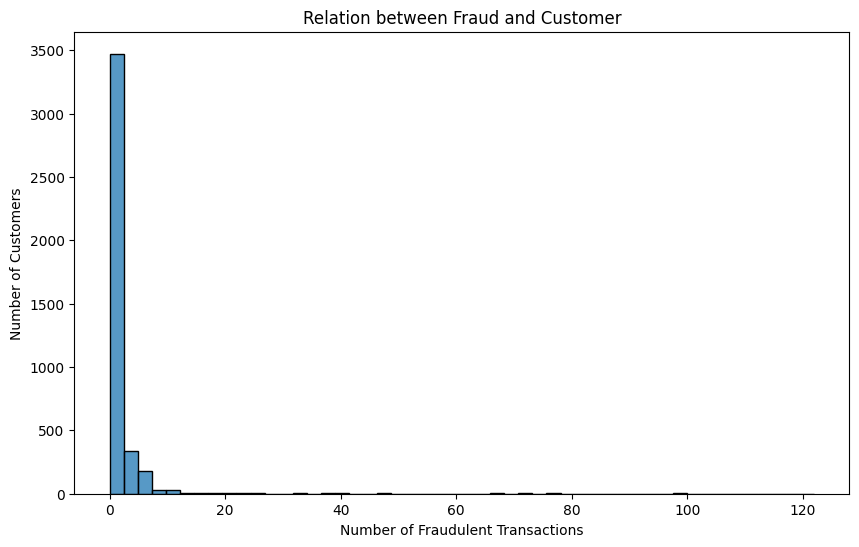

In [132]:
customer_fraud = df.groupby('customer')['fraud'].sum().reset_index()
customer_fraud_sorted = customer_fraud.sort_values('fraud', ascending=False)

plt.figure(figsize=(10, 6))
sns.histplot(customer_fraud_sorted['fraud'], bins=50, kde=False)
plt.title('Relation between Fraud and Customer')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-133-6a1519a3a400>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


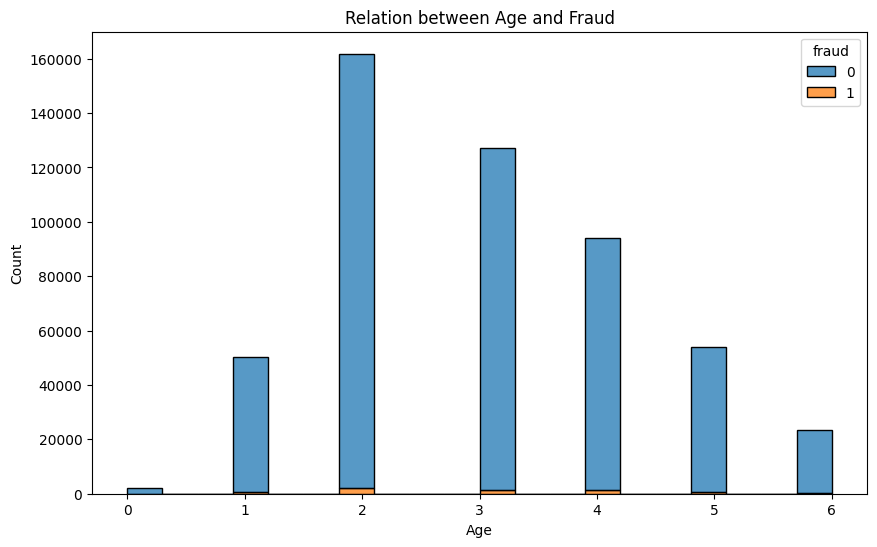

In [133]:
# Remove 'U' from the age column
df['age'] = df['age'].replace('U', None)

# Extract numeric characters, convert to numeric, and handle errors
df['age'] = df['age'].str.extract('(\d+)')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop NaN values if any remain
df = df.dropna(subset=['age'])

# Convert to integers
df['age'] = df['age'].astype(int)

# Now, plot the relation between age and fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='fraud', multiple='stack', bins=20)
plt.title('Relation between Age and Fraud')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


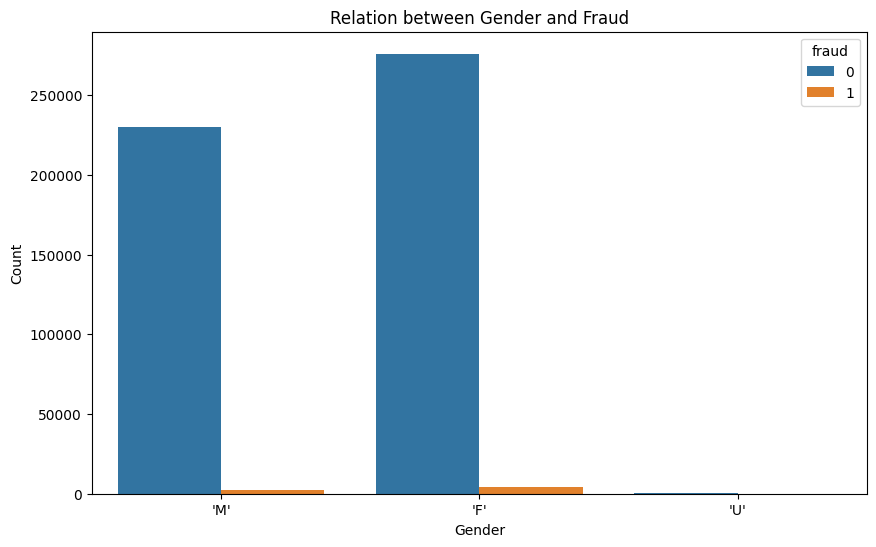

In [134]:
df['gender'] = df['gender'].replace(['E', 'U'], None).dropna()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='fraud')
plt.title('Relation between Gender and Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [135]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


label_encoders = {}
categorical_columns = ['gender', 'category']  # Update this list as needed

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Create additional features if needed (e.g., 'amount' as a log transformation)
df['amount_log'] = df['amount'].apply(lambda x: np.log(x + 1))

# Drop any columns not used in modeling
df = df.drop(columns=['amount'])


In [136]:
df.head()

,step,customer,age,gender,merchant,category,fraud,amount_log
0,0,'C583110837',3,1,'M480139044',4,1,3.812424
1,0,'C1332295774',3,1,'M480139044',4,1,5.785362
2,0,'C1160421902',3,1,'M857378720',6,1,5.177956
3,0,'C966214713',3,1,'M857378720',6,1,5.824258
4,0,'C1450140987',4,0,'M1198415165',14,1,5.398660


In [137]:
# Create new columns for fraud counts per customer
df['fraud_count'] = df.groupby('customer')['fraud'].transform('sum')
df['no_fraud_count'] = df.groupby('customer')['fraud'].transform(lambda x: (~x.astype(bool)).sum())

# Check the first few rows to verify the new columns
print(df[['customer', 'fraud_count', 'no_fraud_count']].head())


        customer  fraud_count  no_fraud_count
0   'C583110837'           11             107
1  'C1332295774'           10              33
2  'C1160421902'            4             104
3   'C966214713'            3              81
4  'C1450140987'           15             110


In [138]:
df.head()

,step,customer,age,gender,merchant,category,fraud,amount_log,fraud_count,no_fraud_count
0,0,'C583110837',3,1,'M480139044',4,1,3.812424,11,107
1,0,'C1332295774',3,1,'M480139044',4,1,5.785362,10,33
2,0,'C1160421902',3,1,'M857378720',6,1,5.177956,4,104
3,0,'C966214713',3,1,'M857378720',6,1,5.824258,3,81
4,0,'C1450140987',4,0,'M1198415165',14,1,5.398660,15,110


In [139]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
merchant_encoder = LabelEncoder()

# Fit and transform the merchant column
df['merchant_encoded'] = merchant_encoder.fit_transform(df['merchant'])

# Drop the original merchant column
df = df.drop(columns=['merchant'])


In [140]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
merchant_encoder = LabelEncoder()

# Fit and transform the merchant column
df['customer_encoded'] = merchant_encoder.fit_transform(df['customer'])

# Drop the original merchant column
df = df.drop(columns=['customer'])


In [141]:
df.head()

,step,age,gender,category,fraud,amount_log,fraud_count,no_fraud_count,merchant_encoded,customer_encoded
0,0,3,1,4,1,3.812424,11,107,34,3212
1,0,3,1,4,1,5.785362,10,33,34,720
2,0,3,1,6,1,5.177956,4,104,44,361
3,0,3,1,6,1,5.824258,3,81,44,4031
4,0,4,0,14,1,5.398660,15,110,2,965


In [142]:
# Exclude customer ID and other non-numeric columns
X = df.drop(columns=['fraud'])  # Exclude 'customer' and 'fraud'
y = df['fraud']


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [166]:
from sklearn.preprocessing import StandardScaler
# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


In [168]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [107]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151949
           1       0.92      0.83      0.87      1842

    accuracy                           1.00    153791
   macro avg       0.96      0.91      0.93    153791
weighted avg       1.00      1.00      1.00    153791

Confusion Matrix:
[[151819    130]
 [   321   1521]]


In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151949
           1       0.81      0.82      0.81      1842

    accuracy                           1.00    153791
   macro avg       0.91      0.91      0.91    153791
weighted avg       1.00      1.00      1.00    153791

Confusion Matrix:
[[151602    347]
 [   338   1504]]


In [112]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151949
           1       0.92      0.83      0.87      1842

    accuracy                           1.00    153791
   macro avg       0.96      0.91      0.93    153791
weighted avg       1.00      1.00      1.00    153791

Confusion Matrix:
[[151819    130]
 [   321   1521]]


In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert target variable to categorical if needed
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Initialize the model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train_cat, epochs=9, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred_ann_prob = ann_model.predict(X_test)
y_pred_ann = y_pred_ann_prob.argmax(axis=-1)

# Evaluate the model
print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))


Epoch 1/9


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8972/8972 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9859 - loss: 0.1136 - val_accuracy: 0.9913 - val_loss: 0.0274
Epoch 2/9
8972/8972 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9932 - val_loss: 0.0207
Epoch 3/9
8972/8972 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9941 - loss: 0.0169 - val_accuracy: 0.9942 - val_loss: 0.0179
Epoch 4/9
8972/8972 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9944 - loss: 0.0160 - val_accuracy: 0.9950 - val_loss: 0.0149
Epoch 5/9
8972/8972 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9950 - loss: 0.0141 - val_accuracy: 0.9952 - val_loss: 0.0131
Epoch 6/9
8972/8972 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9952 - loss: 0.0140 - val_accuracy: 0.9922 - val_loss: 0.0191
Epoch 7/9
8972/8972 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9953 - loss: 0.0134 - val_accuracy: 0.9950 - val_loss: 0.0133
Epoch 8/9
8972/8972 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9954 - loss: 0.0132 - val_accura

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Use the best model
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Evaluate
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151949
           1       0.90      0.78      0.84      1842

    accuracy                           1.00    153791
   macro avg       0.95      0.89      0.92    153791
weighted avg       1.00      1.00      1.00    153791

Confusion Matrix:
[[151789    160]
 [   402   1440]]


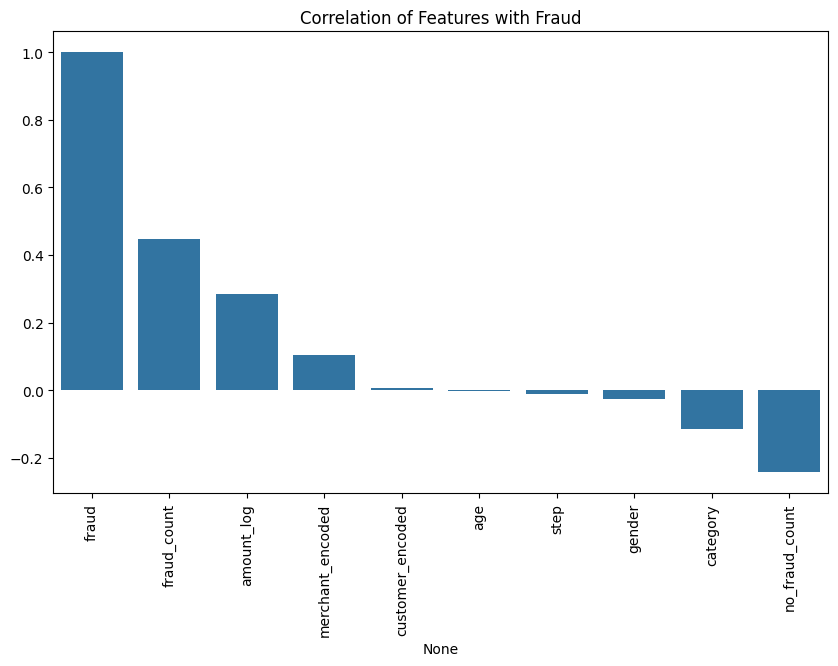

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of each feature with the target variable 'fraud'
correlation_with_fraud = correlation_matrix['fraud'].sort_values(ascending=False)

# Plot the correlation of each feature with fraud
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_fraud.index, y=correlation_with_fraud.values)
plt.title('Correlation of Features with Fraud')
plt.xticks(rotation=90)
plt.show()


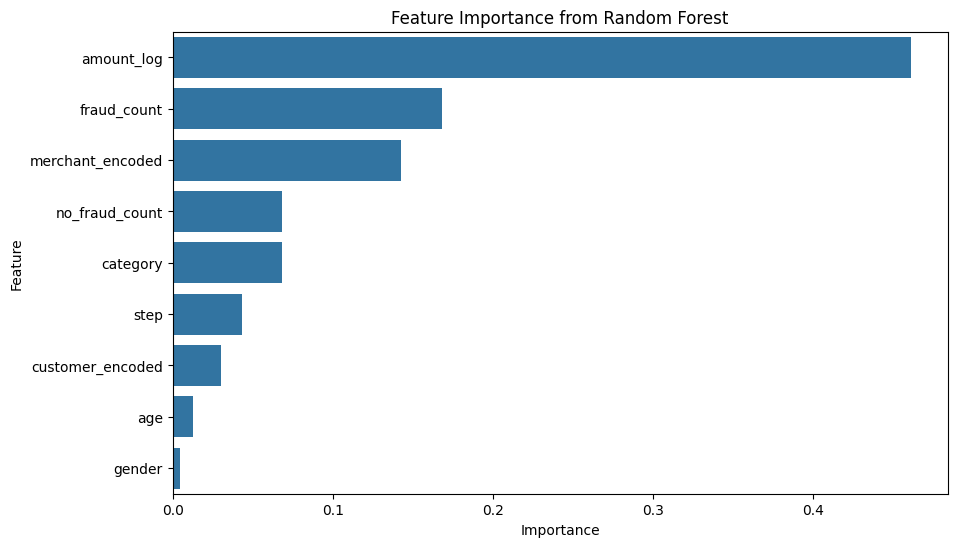

In [148]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance from Random Forest')
plt.show()


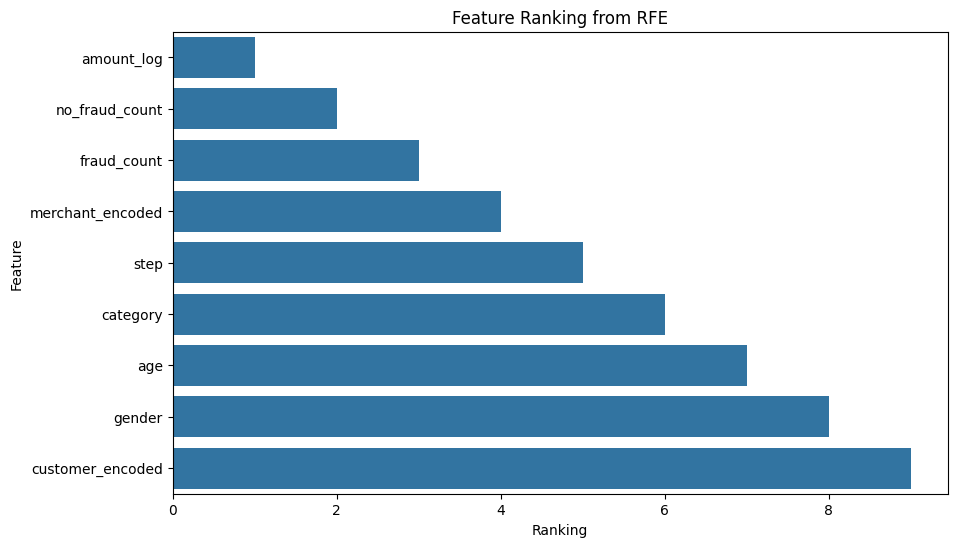

In [149]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(max_iter=10000)

# Perform RFE
rfe = RFE(estimator=logreg, n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking
})

# Sort features by ranking (lower is better)
features_df = features_df.sort_values(by='Ranking', ascending=True)

# Plot the feature rankings
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=features_df)
plt.title('Feature Ranking from RFE')
plt.show()


In [169]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151949
           1       0.91      0.83      0.86      1842

    accuracy                           1.00    153791
   macro avg       0.95      0.91      0.93    153791
weighted avg       1.00      1.00      1.00    153791

Confusion Matrix:
[[151790    159]
 [   318   1524]]
